#### Import libraries and packages

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.metrics import mean_squared_error
from sklearn.utils import column_or_1d
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error


#### Import dataset

In [2]:
df = pd.read_csv("C:\\Users\\DNV\\OneDrive\\Desktop\\Data-Gold.csv",parse_dates=True,index_col=0)

#### Create a new Timestamp column for time series forecasting

In [3]:
df['Timestamp'] = pd.to_datetime(df.index).astype(np.int64) / 10**9
df_index = df.index
df_open = df['VND'].values.reshape(-1, 1)
df.head()

df

,VND,Timestamp
Date,,
2012-01-02,32202288.50,1.325462e+09
2012-01-03,33607538.00,1.325549e+09
2012-01-04,33923003.00,1.325635e+09
2012-01-05,33628569.00,1.325722e+09
2012-01-06,34000652.75,1.325808e+09
...,...,...
2022-12-26,41586906.00,1.672013e+09
2022-12-27,41894838.00,1.672099e+09
2022-12-28,41727084.00,1.672186e+09


#### Plotting Gold price chart

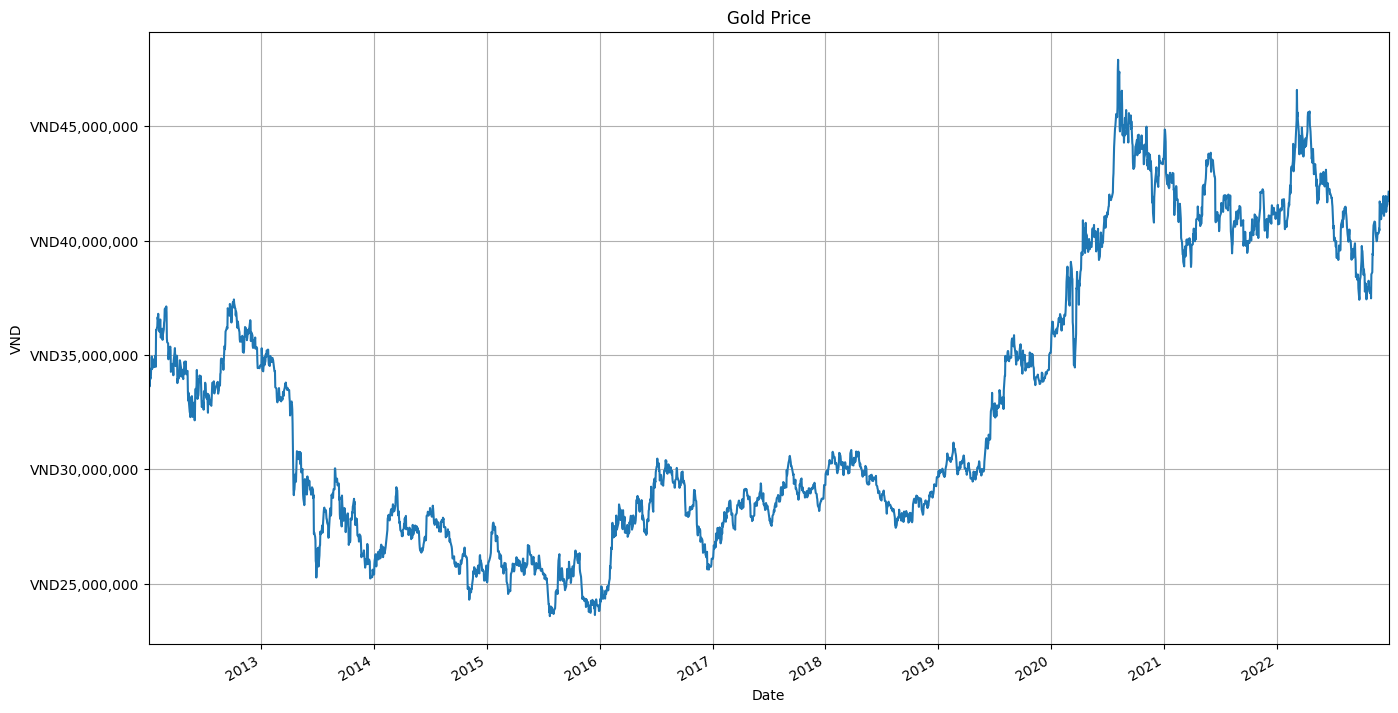

In [4]:
formatter = ticker.StrMethodFormatter('VND{x:,.0f}')

title = 'Gold Price'
ylabel = 'VND'
xlabel = 'Date'

ax = df['VND'].plot(figsize=(16, 9), title=title)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)
ax.grid(True)

#### Normalizing / scaling data to facilitate model building

In [5]:
LR_sc = StandardScaler()

df_scaled = df.copy()
df_scaled['VND'] = LR_sc.fit_transform(df_open)
df_scaled

,VND,Timestamp
Date,,
2012-01-02,-0.062575,1.325462e+09
2012-01-03,0.167826,1.325549e+09
2012-01-04,0.219549,1.325635e+09
2012-01-05,0.171274,1.325722e+09
2012-01-06,0.232280,1.325808e+09
...,...,...
2022-12-26,1.476100,1.672013e+09
2022-12-27,1.526588,1.672099e+09
2022-12-28,1.499084,1.672186e+09


In [6]:
X_sc = StandardScaler()
y_sc = StandardScaler()

X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, 0].values.reshape(-1, 1)


X_scaled = X_sc.fit_transform(X)
y_scaled = y_sc.fit_transform(y)


df_scaled = pd.DataFrame(index=df_index)
df_scaled['Timestamp'] = X_scaled
df_scaled['VND'] = y_scaled
df_scaled.head()

,Timestamp,VND
Date,,
2012-01-02,-1.730686,-0.062575
2012-01-03,-1.729824,0.167826
2012-01-04,-1.728962,0.219549
2012-01-05,-1.728100,0.171274
2012-01-06,-1.727237,0.232280


#### Split data for training and testing ( 9-1 )

In [7]:
interrupt = int(len(df_scaled) * .9)

train_data, test_data = df_scaled[:interrupt], df_scaled[interrupt:]
index_test = df_scaled.index[interrupt:]
print(train_data.shape)
print(test_data.shape)

(2583, 2)
(287, 2)


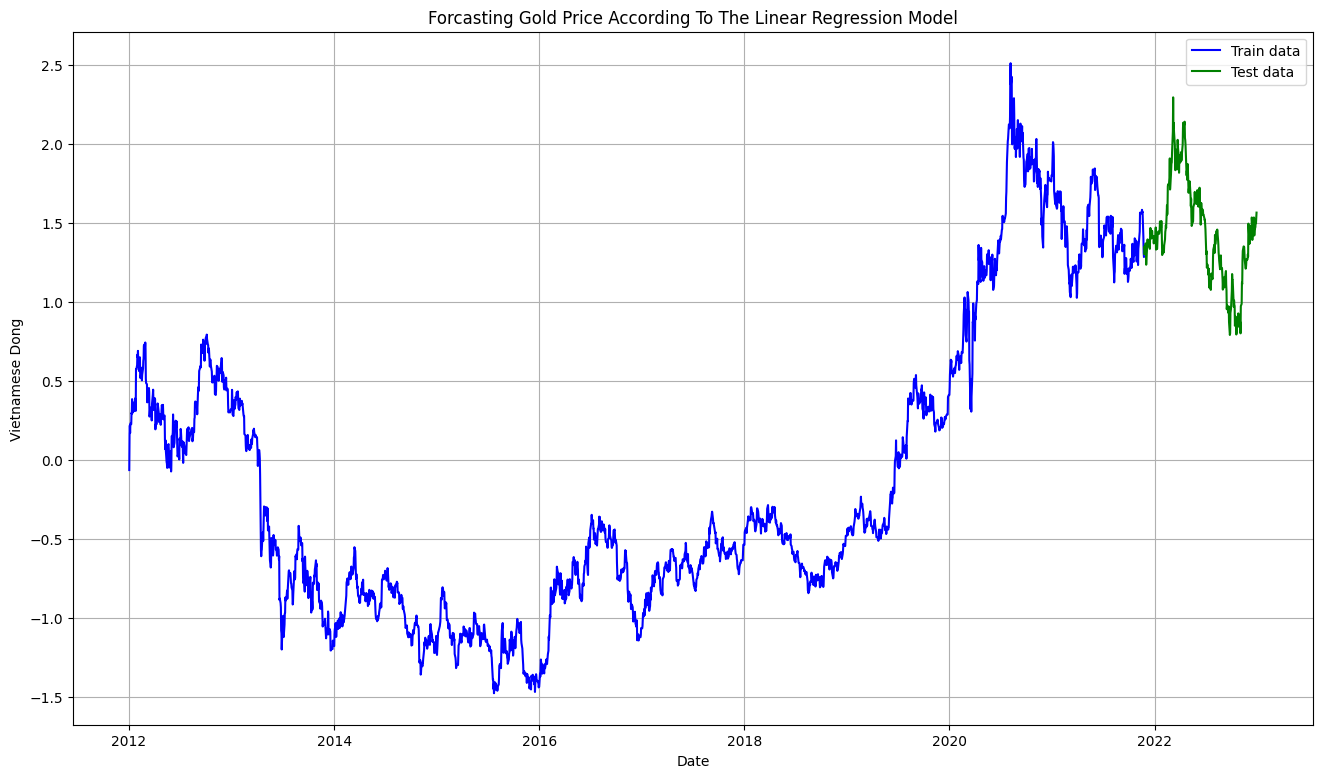

In [23]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.ylabel('Vietnamese Dong')
plt.xlabel('Date')
plt.title("Forcasting Gold Price According To The Linear Regression Model")
plt.plot(train_data['VND'], 'blue', label='Train data')
plt.plot(test_data['VND'], 'green', label='Test data')
plt.legend()

#### Determine the independent variable (X) and the dependent variable (y)

In [9]:
X_train = train_data['Timestamp'].values.reshape(-1, 1)
y_train = train_data['VND'].values.reshape(-1, 1)

X_test = test_data['Timestamp'].values.reshape(-1, 1)
y_test = test_data['VND'].values.reshape(-1, 1)

#### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train,y_train)
pred = LR_model.predict(X_test)
pred

array([[0.69174327],
       [0.6922137 ],
       [0.69362501],
       [0.69409545],
       [0.69456588],
       [0.69503632],
       [0.69550675],
       [0.69691806],
       [0.69738849],
       [0.69785893],
       [0.69832936],
       [0.6987998 ],
       [0.70021111],
       [0.70068154],
       [0.70115198],
       [0.70162241],
       [0.70209285],
       [0.70350415],
       [0.70397459],
       [0.70444503],
       [0.70491546],
       [0.7053859 ],
       [0.7067972 ],
       [0.70726764],
       [0.70773807],
       [0.70820851],
       [0.70867894],
       [0.71009025],
       [0.71056069],
       [0.71103112],
       [0.71150156],
       [0.71197199],
       [0.7133833 ],
       [0.71385373],
       [0.71432417],
       [0.7147946 ],
       [0.71526504],
       [0.71667635],
       [0.71714678],
       [0.71761722],
       [0.71808765],
       [0.71855809],
       [0.71996939],
       [0.72043983],
       [0.72091026],
       [0.7213807 ],
       [0.72185114],
       [0.723

#### Transform back to original form

In [11]:
inv_pred = y_sc.inverse_transform(pred.reshape(-1, 1))
inv_test = y_sc.inverse_transform(y_test.reshape(-1, 1))


#### Graph the test set and the prediction results

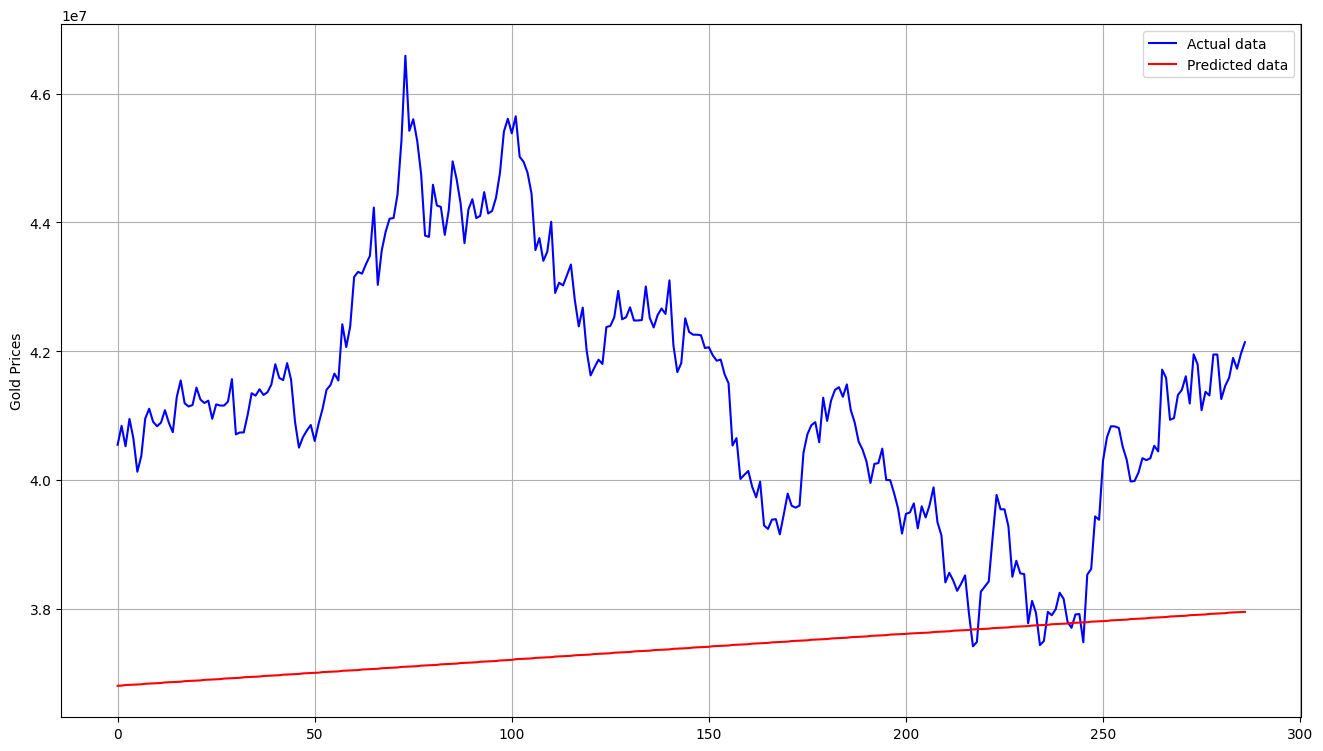

In [12]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.ylabel('Gold Prices')
plt.plot(column_or_1d(inv_test), 'blue', label='Actual data')
plt.plot(column_or_1d(inv_pred), 'red', label='Predicted data')
plt.legend()

#### Model Evaluation

In [13]:
from sklearn.metrics import r2_score
mae = mean_absolute_error(inv_test, inv_pred) 
mape = mean_absolute_percentage_error(inv_test, inv_pred)
mse = mean_squared_error(inv_test, inv_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(inv_test, inv_pred)
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape*100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 3941190.10
MAPE: 9.33%
MSE: 19858429883611.97
RMSE: 4456279.83
R2: -4.39


In [14]:
df_pred = pd.DataFrame(columns=['Actual', 'Pred', 'Error'], index=index_test)
df_pred['Actual'] = column_or_1d(inv_test)
df_pred['Pred'] = column_or_1d(inv_pred)
df_pred['Error'] = df_pred['Actual'] - df_pred['Pred']
df_pred

,Actual,Pred,Error
Date,,,
2021-11-25,40546299.04,3.680299e+07,3.743309e+06
2021-11-26,40840344.31,3.680586e+07,4.034485e+06
2021-11-29,40523204.39,3.681447e+07,3.708737e+06
2021-11-30,40948149.18,3.681734e+07,4.130813e+06
2021-12-01,40642813.75,3.682021e+07,3.822608e+06
...,...,...,...
2022-12-26,41586906.00,3.793922e+07,3.647690e+06
2022-12-27,41894838.00,3.794209e+07,3.952752e+06
2022-12-28,41727084.00,3.794495e+07,3.782129e+06


#### Predict the next 30 days

In [15]:
df1 = pd.read_csv("C:\\Users\\DNV\\OneDrive\\Desktop\\next30days.csv",parse_dates=True,index_col=0)

In [16]:
df1['Timestamp'] = pd.to_datetime(df1.index).astype(np.int64) / 10**9
df_index1 = df1.index
df1

,VND,Timestamp
Date,,
2022-12-31,NaN,1.672445e+09
2023-01-01,NaN,1.672531e+09
2023-01-02,NaN,1.672618e+09
2023-01-03,NaN,1.672704e+09
2023-01-04,NaN,1.672790e+09
2023-01-05,NaN,1.672877e+09
2023-01-06,NaN,1.672963e+09
2023-01-07,NaN,1.673050e+09
2023-01-08,NaN,1.673136e+09


In [17]:
X_sc = StandardScaler()
X = df1.iloc[:, 1].values.reshape(-1, 1)
X_scaled = X_sc.fit_transform(X)
df_scaled_future = pd.DataFrame(index=df_index1)
df_scaled_future['Timestamp'] = X_scaled
df_scaled_future.head()

,Timestamp
Date,
2022-12-31,-1.678744
2023-01-01,-1.570438
2023-01-02,-1.462132
2023-01-03,-1.353826
2023-01-04,-1.245520


In [18]:
X_future = df_scaled_future['Timestamp'].values.reshape(-1, 1)

In [19]:
pred_future = LR_model.predict(X_future)

In [20]:
inv_pred_future = y_sc.inverse_transform(pred_future.reshape(-1, 1))

In [21]:
df_pred1 = pd.DataFrame(columns=['Pred'], index=df_index1)
df_pred1['Pred'] = column_or_1d(inv_pred_future)
df_pred1.head()

,Pred
Date,
2022-12-31,2.660350e+07
2023-01-01,2.696397e+07
2023-01-02,2.732444e+07
2023-01-03,2.768491e+07
2023-01-04,2.804538e+07


In [22]:
df_pred1.to_csv(r"C:\\Users\\DNV\\OneDrive\\Desktop\\LR30d.csv")